<a href="https://colab.research.google.com/github/SubhanMirza56/Explainable-AI/blob/main/explainable_AI_on_diabetes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/1

In [1]:
from pycaret.datasets import get_data
from pycaret.classification import *

In [2]:
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
clf1 = setup(data=data, target = 'Class variable',session_id=345)

,Description,Value
0,Session id,345
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [4]:
best_model = compare_models(include=['rf','xgboost','dt','knn'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7506,0.8217,0.5719,0.6734,0.6144,0.4324,0.4383,1.0260
knn,K Neighbors Classifier,0.7190,0.7337,0.5126,0.6400,0.5611,0.3580,0.3682,0.0440
xgboost,Extreme Gradient Boosting,0.7095,0.7819,0.5655,0.5940,0.5716,0.3538,0.3593,0.0880
dt,Decision Tree Classifier,0.6968,0.6660,0.5664,0.5780,0.5678,0.3351,0.3379,0.0290


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7673,0.8437,0.5553,0.7183,0.6201,0.4577,0.4689,0.0500
nb,Naive Bayes,0.7638,0.8247,0.5886,0.6953,0.6349,0.4622,0.4674,0.0270
ridge,Ridge Classifier,0.7617,0.8432,0.5444,0.7166,0.6113,0.4451,0.4582,0.0270
lda,Linear Discriminant Analysis,0.7598,0.8431,0.5602,0.7091,0.6174,0.4466,0.4586,0.0270
rf,Random Forest Classifier,0.7506,0.8217,0.5719,0.6734,0.6144,0.4324,0.4383,0.3420
et,Extra Trees Classifier,0.7488,0.8228,0.5404,0.6933,0.6003,0.4214,0.4330,0.1730
ada,Ada Boost Classifier,0.7450,0.7980,0.5827,0.6597,0.6143,0.4255,0.4308,0.1120
gbc,Gradient Boosting Classifier,0.7319,0.8066,0.5614,0.6334,0.5926,0.3943,0.3977,0.1710
qda,Quadratic Discriminant Analysis,0.7302,0.8213,0.5506,0.6428,0.5775,0.3847,0.3946,0.0270
lightgbm,Light Gradient Boosting Machine,0.7208,0.7834,0.5769,0.6149,0.5906,0.3796,0.3837,0.5610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [6]:
final_model = finalize_model(best_model)

In [7]:
predictions = predict_model(final_model,data=data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7812,0.8391,0.5821,0.7358,0.6500,0.4940,0.5012


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.7194
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9507
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.7926
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9573
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.8897


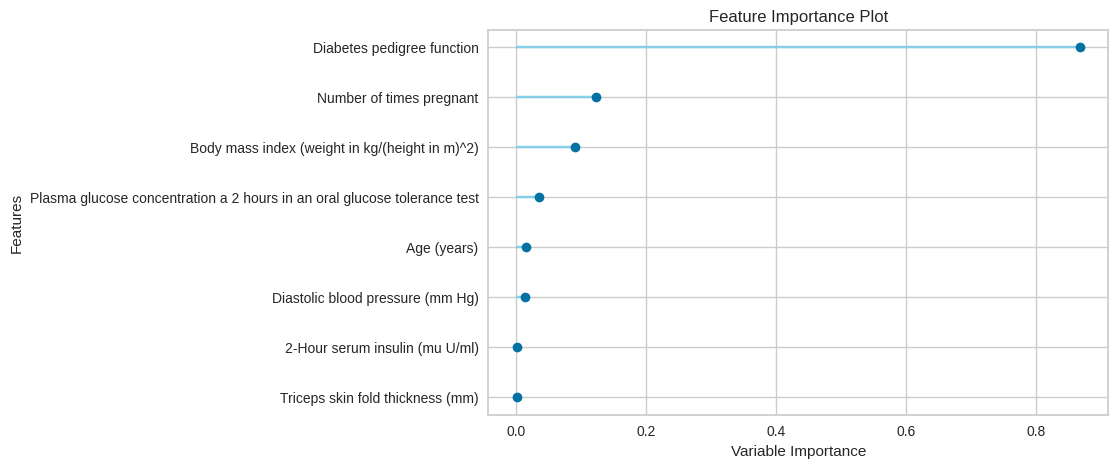

In [10]:
plot_model(estimator=final_model,plot='feature')